# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [47]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [48]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port hedland
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | zalingei
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | hayma'
City not found. Skipping...
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | soio
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | mermoz boabab
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | nagqu
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | kapuskasing
Processing Record 18 of Set 1 | dawei
Processing Record 19 of Set 1 | dembi dolo
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | keflavik
Pr

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [50]:
# Display sample data
city_data_df['Max Temp'] = city_data_df['Max Temp']/10
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port hedland,-20.3167,118.5667,30.518,20,12,9.77,AU,1713927646
1,papatowai,-46.5619,169.4708,28.982,65,100,1.59,NZ,1713927648
2,iqaluit,63.7506,-68.5145,27.000,79,100,2.06,CA,1713927648
3,bredasdorp,-34.5322,20.0403,28.838,96,100,0.38,ZA,1713927651
4,zalingei,12.9096,23.4741,29.921,14,6,2.03,SD,1713927651


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port hedland,-20.3167,118.5667,30.518,20,12,9.77,AU,1713927646
1,papatowai,-46.5619,169.4708,28.982,65,100,1.59,NZ,1713927648
2,iqaluit,63.7506,-68.5145,27.000,79,100,2.06,CA,1713927648
3,bredasdorp,-34.5322,20.0403,28.838,96,100,0.38,ZA,1713927651
4,zalingei,12.9096,23.4741,29.921,14,6,2.03,SD,1713927651


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

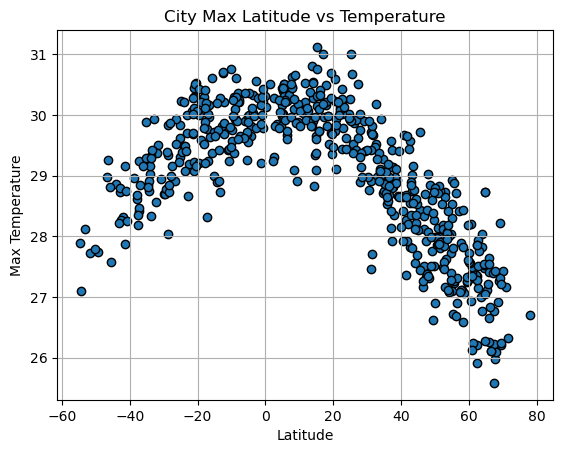

In [55]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors= 'black')
ax.set_title('City Max Latitude vs Temperature')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature')
ax.grid(visible = True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

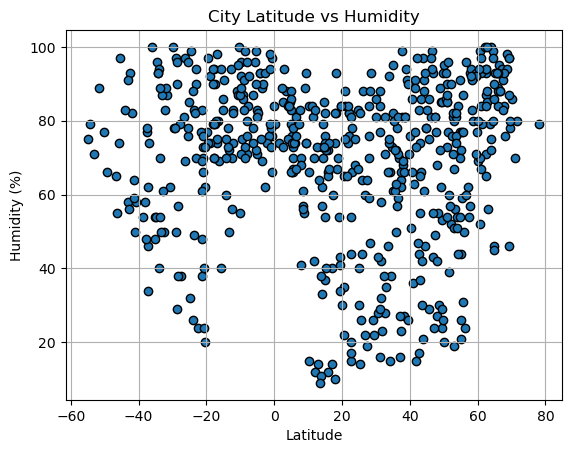

In [56]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()
ax.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors= 'black')
ax.set_title('City Latitude vs Humidity')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid(visible = True)



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

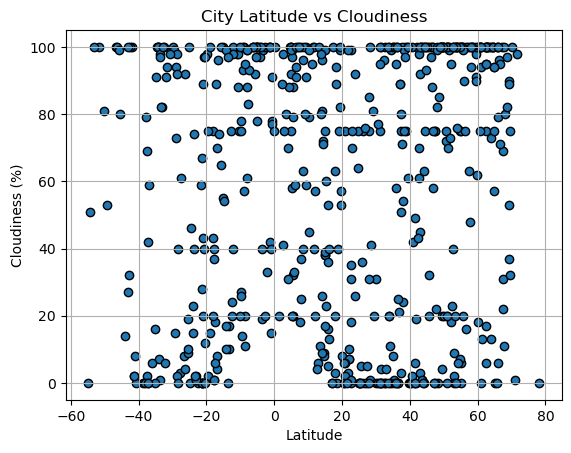

In [57]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()
ax.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors= 'black')
ax.set_title('City Latitude vs Cloudiness')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid(visible = True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

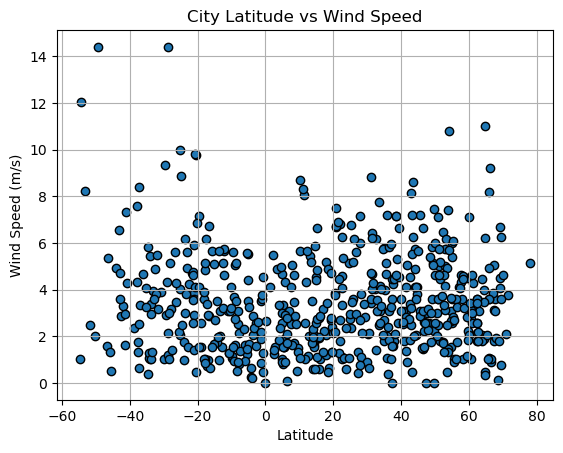

In [58]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()
ax.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors= 'black')
ax.set_title('City Latitude vs Wind Speed')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.grid(visible = True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Calculate the regression line
    regression_line = slope * x_data + intercept
    
    # Plot the data points
    plt.scatter(x_data, y_data, color='blue', alpha=0.5)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color='red')
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Add text box with regression equation and r-value
    equation_text = f'y={slope:.2f}x + {intercept:.2f}\nR-value: {r_value:.2f}'
    plt.text(0.05, 0.5, equation_text, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Show plot
    plt.grid(True)
    plt.show()

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iqaluit,63.7506,-68.5145,27.000,79,100,2.06,CA,1713927648
4,zalingei,12.9096,23.4741,29.921,14,6,2.03,SD,1713927651
8,stanley,54.8680,-1.6985,27.719,77,75,3.09,GB,1713927377
10,mermoz boabab,14.7065,-17.4758,29.346,85,9,5.87,SN,1713927655
11,iskateley,67.6803,53.1512,25.983,84,11,3.58,RU,1713927551


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port hedland,-20.3167,118.5667,30.518,20,12,9.77,AU,1713927646
1,papatowai,-46.5619,169.4708,28.982,65,100,1.59,NZ,1713927648
3,bredasdorp,-34.5322,20.0403,28.838,96,100,0.38,ZA,1713927651
5,adamstown,-25.0660,-130.1015,29.617,85,100,9.97,PN,1713927572
6,ancud,-41.8697,-73.8203,28.310,82,100,3.29,CL,1713927617


###  Temperature vs. Latitude Linear Regression Plot

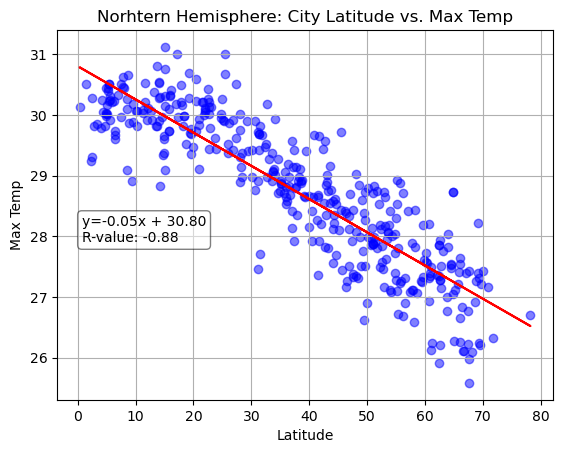

In [62]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Max Temp']

#label axes & title
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Norhtern Hemisphere: City Latitude vs. Max Temp'

plot_linear_regression(x_data, y_data, x_label, y_label, title)

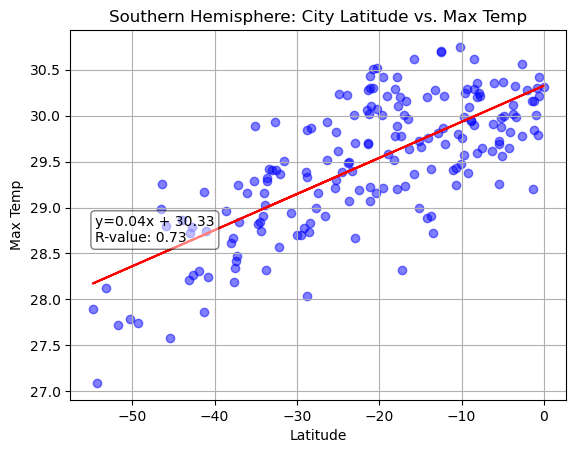

In [63]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Max Temp']

#label axes & title
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Southern Hemisphere: City Latitude vs. Max Temp'

plot_linear_regression(x_data, y_data, x_label, y_label, title)

**Discussion about the linear relationship:** It seems as thought there is a positive correlation between Latitude and Maximum Temperature in the southern hemisphere, meaning that as the latitude increases, the temperature also increases. There is a negative correlation between Latitude and Maximum Temperature in the Northern hemisphere, meaning that as the latitude increases, the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

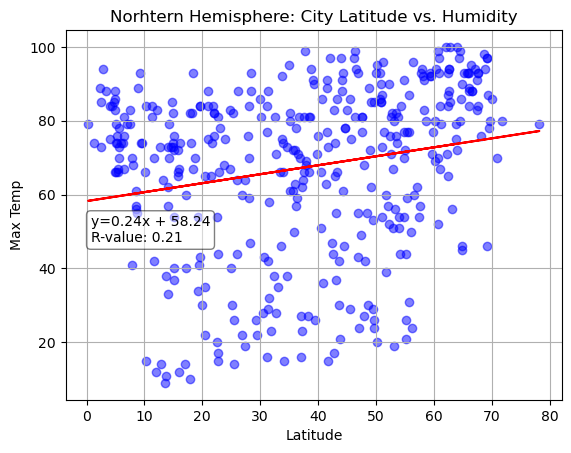

In [64]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Humidity']

#label axes & title
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Norhtern Hemisphere: City Latitude vs. Humidity'

plot_linear_regression(x_data, y_data, x_label, y_label, title)

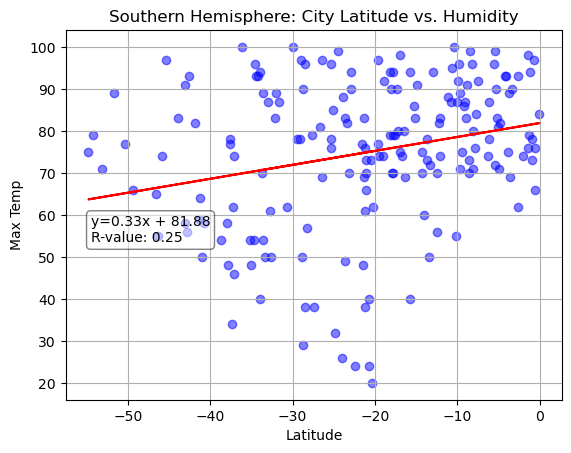

In [65]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Humidity']

#label axes & title
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Southern Hemisphere: City Latitude vs. Humidity'

plot_linear_regression(x_data, y_data, x_label, y_label, title)

**Discussion about the linear relationship:** For both the northern and southern hemispheres, there seems to be no strong correlations between latitude and longitude. The r-values are not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

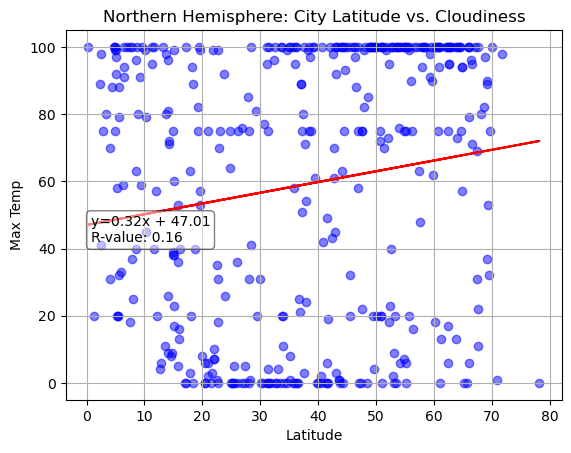

In [66]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Cloudiness']

#label axes & title
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Northern Hemisphere: City Latitude vs. Cloudiness'

plot_linear_regression(x_data, y_data, x_label, y_label, title)

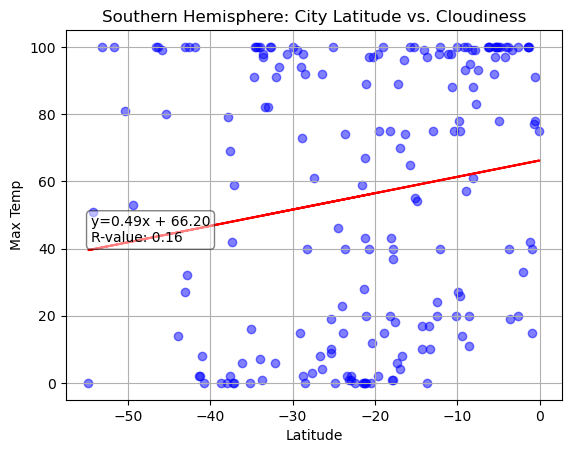

In [67]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Cloudiness']

#label axes & title
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Southern Hemisphere: City Latitude vs. Cloudiness'

plot_linear_regression(x_data, y_data, x_label, y_label, title)

**Discussion about the linear relationship:** Similar to the linear relationships between Latitude and Humidity, the linear relationship between latitude and cloudiness also do not seem to be significant or strongly correlated.

### Wind Speed vs. Latitude Linear Regression Plot

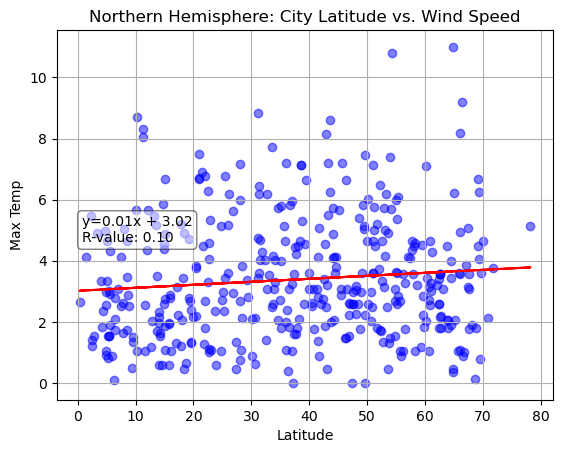

In [68]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Wind Speed']

#label axes & title
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Northern Hemisphere: City Latitude vs. Wind Speed'

plot_linear_regression(x_data, y_data, x_label, y_label, title)

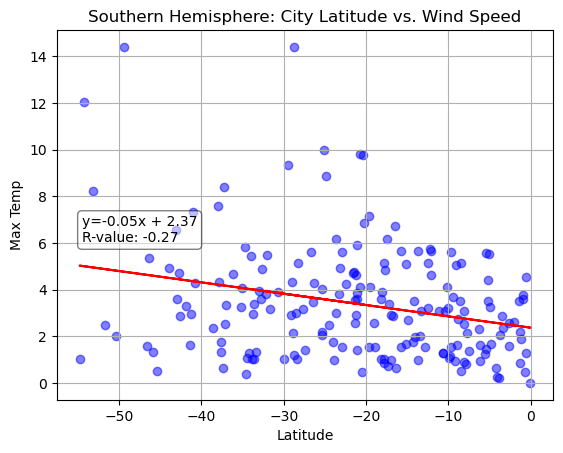

In [69]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Wind Speed']

#label axes & title
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Southern Hemisphere: City Latitude vs. Wind Speed'

plot_linear_regression(x_data, y_data, x_label, y_label, title)

**Discussion about the linear relationship:** Since the r-value for both the linear regressions for the Southern Hemisphere and Northern Hemisphere are close to 0, there seems to be no strong correlation between city latitude and wind speed.